# k Nearest Neighbour model

# Wine example

https://inferentialthinking.com/chapters/17/4/Implementing_the_Classifier.html

C:\Users\kalul\AppData\Local\Temp\ipykernel_8004\2440769161.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


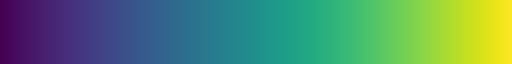

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Set style for seaborn plots
sns.set_style('dark')
sns.color_palette("viridis", as_cmap=True)

In [2]:
wine = pd.read_csv('wine.csv')
wine

,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diulted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
def is_one(x):
    if x == 1:
        return 1
    else:
        return 0

wine['Class'] = wine['Class'].apply(is_one)

In [4]:
def distance(point1, point2):
    """Returns the distance between point1 and point2
    where each argument is an array 
    consisting of the coordinates of the point"""
    return np.sqrt(np.sum((point1 - point2)**2))

def all_distances(training, new_point):
    """
    Returns an array of distances between each point in the training set
    and the new point (which is a row of attributes).
    
    Parameters:
    - training (pandas.DataFrame): The training set containing multiple points.
    - new_point (pandas.Series): The new point represented as a row of attributes.

    Returns:
    - pandas.Series: An array of distances between the new point and each point in the training set.
    """
    attributes = training.drop(columns = 'Class')
    return attributes.apply(lambda row: distance(np.array(new_point), np.array(row)), axis=1)


def table_with_distances(training, new_point):
    """
    Augments the training table with a column of distances from new_point.
    
    Parameters:
    - training (pandas.DataFrame): The training set containing multiple points.
    - new_point (pandas.Series): The new point represented as a row of attributes.

    Returns:
    - pandas.DataFrame: The training table with an additional 'Distance' column.
    """
    attributes = training.drop(columns='Class')
    distances = attributes.apply(lambda row: distance(np.array(new_point), np.array(row)), axis=1)
    return pd.concat([training, distances.rename('Distance')], axis=1)

def closest(training, new_point, k):
    """
    Returns a table of the k rows of the augmented table
    corresponding to the k smallest distances.
    
    Parameters:
    - training (pandas.DataFrame): The training set containing multiple points.
    - new_point (pandas.Series): The new point represented as a row of attributes.
    - k (int): The number of closest rows to return.

    Returns:
    - pandas.DataFrame: The table of the k rows with the smallest distances.
    """
    with_dists = table_with_distances(training, new_point)
    sorted_by_distance = with_dists.sort_values('Distance')
    topk = sorted_by_distance.head(k)
    return topk

In [5]:
attributes = wine.drop(columns = 'Class')
special_wine = attributes.iloc[0, :]

In [6]:
closest(wine, special_wine, 5)

,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diulted wines,Proline,Distance
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0.000000
54,1,13.74,1.67,2.25,16.4,118,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060,10.392805
45,1,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080,22.340748
48,1,14.10,2.02,2.40,18.8,103,2.75,2.92,0.32,2.38,6.20,1.07,2.75,1060,24.760232
46,1,14.38,3.59,2.28,16.0,102,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065,25.094663


Bingo! The first row is the nearest neighbor, which is itself – there’s a 0 in the Distance column as expected. All five nearest neighbors are of Class 1, which is consistent with our earlier observation that Class 1 wines appear to be clumped together in some dimensions.

In [7]:
def majority(topkclasses):
    mode_result = topkclasses['Class'].mode()
    return mode_result.iloc[0] if not mode_result.empty else None

def classify(training, new_point, k):
    closestk = closest(training, new_point, k)
    topkclasses = closestk[['Class']]
    return majority(topkclasses)

In [8]:
classify(wine, special_wine, 5)

1

If we change special_wine to be the last one in the dataset, is our classifier able to tell that it’s in Class 0?

In [9]:
special_wine = attributes.iloc[-1, :]
classify(wine, special_wine, 5)

0

Yes! The classifier gets this one right too.

But we don’t yet know how it does with all the other wines, and in any case we know that testing on wines that are already part of the training set might be over-optimistic. In the final section of this chapter, we will separate the wines into a training and test set and then measure the accuracy of our classifier on the test set.

OK, so let’s apply the hold-out method to evaluate the effectiveness of the 
-nearest neighbor classifier for identifying wines. The data set has 178 wines, so we’ll randomly permute the data set and put 89 of them in the training set and the remaining 89 in the test set.

In [10]:
train_set, test_set = train_test_split(
    wine, test_size = 0.5, random_state = 1
)
train_set

,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diulted wines,Proline
88,0,11.64,2.06,2.46,21.6,84,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680
102,0,12.34,2.45,2.46,21.0,98,2.56,2.11,0.34,1.31,2.80,0.80,3.38,438
46,1,14.38,3.59,2.28,16.0,102,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065
62,0,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630
74,0,11.96,1.09,2.30,21.0,101,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0,12.70,3.55,2.36,21.5,106,1.70,1.20,0.17,0.84,5.00,0.78,1.29,600
137,0,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515
72,0,13.49,1.66,2.24,24.0,87,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472
140,0,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600


In [11]:
def count_zero(array):
    """Counts the number of 0's in an array"""
    return len(array) - np.count_nonzero(array)

def count_equal(array1, array2):
    """Takes two numerical arrays of equal length
    and counts the indices where the two are equal"""
    return len(array1) - np.count_nonzero(array1 - array2)

def evaluate_accuracy(training, test, k):
    def classify_testrow(row):
        return classify(training, row, k)

    # Extract the 'Class' column from the test DataFrame
    actual_classes = test['Class']

    # Apply classify_testrow to each row in test
    predicted_classes = test.drop(columns=['Class'])
    predicted_classes = predicted_classes.apply(classify_testrow, axis=1)

    # Count the number of correct predictions
    correct_predictions = count_equal(predicted_classes, actual_classes)

    # Calculate accuracy
    accuracy = correct_predictions / len(actual_classes)
    return accuracy

In [12]:
evaluate_accuracy(train_set, test_set, 5)

0.8876404494382022

In [13]:
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('D:\Github\project2\LoanApprovalPrediction.csv')

categorical = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

label_encoder = LabelEncoder()

for col in categorical:
    data[col] = label_encoder.fit_transform(data[col])

train, test = train_test_split(
    data,
    test_size = 0.4, 
    random_state = 404)

train = train.drop(columns = 'Loan_ID')
test = test.drop(columns = 'Loan_ID')

display(train)
display(test)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
286,1,1,2.0,0,0,3153,1560.0,134.0,360.0,1.0,2,1
482,1,1,0.0,0,0,3597,2157.0,119.0,360.0,0.0,0,0
361,1,1,0.0,0,0,19730,5266.0,570.0,360.0,1.0,0,0
0,1,0,0.0,0,0,5849,0.0,NaN,360.0,1.0,2,1
542,1,1,1.0,0,0,5468,1032.0,26.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
191,1,0,0.0,0,0,8333,3750.0,187.0,360.0,1.0,0,1
507,1,1,2.0,1,0,2192,1742.0,45.0,360.0,1.0,1,1
71,1,0,0.0,0,0,3500,0.0,81.0,300.0,1.0,1,1
317,1,1,3.0,0,0,15000,0.0,300.0,360.0,1.0,0,1


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
148,1,1,0.0,0,1,2577,3750.0,152.0,360.0,1.0,0,1
386,1,1,2.0,0,0,3100,1400.0,113.0,360.0,1.0,2,1
156,1,1,0.0,0,0,4583,5625.0,255.0,360.0,1.0,1,1
585,1,1,0.0,1,1,2894,2792.0,155.0,360.0,1.0,0,1
355,1,1,0.0,0,0,3013,3033.0,95.0,300.0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
329,1,1,2.0,0,1,2500,4600.0,176.0,360.0,1.0,0,1
336,1,1,2.0,0,1,2583,2330.0,125.0,360.0,1.0,0,1
97,1,1,0.0,1,0,4188,0.0,115.0,180.0,1.0,1,1
157,1,1,0.0,1,0,1863,1041.0,98.0,360.0,1.0,1,1


In [14]:
def majority(topkclasses):
    mode_result = topkclasses['Loan_Status'].mode()
    return mode_result.iloc[0] if not mode_result.empty else None

def classify(training, new_point, k):
    closestk = closest(training, new_point, k)
    topkclasses = closestk[['Loan_Status']]
    return majority(topkclasses)

def count_zero(array):
    """Counts the number of 0's in an array"""
    return len(array) - np.count_nonzero(array)

def count_equal(array1, array2):
    """Takes two numerical arrays of equal length
    and counts the indices where the two are equal"""
    return len(array1) - np.count_nonzero(array1 - array2)

def evaluate_accuracy(training, test, k):
    def classify_testrow(row):
        return classify(training, row, k)

    # Extract the 'Loan_Status' column from the test DataFrame
    actual_classes = test['Loan_Status']

    # Apply classify_testrow to each row in test
    predicted_classes = test.drop(columns=['Loan_Status'], errors='ignore')
    predicted_classes = predicted_classes.apply(classify_testrow, axis=1)

    # Count the number of correct predictions
    correct_predictions = count_equal(predicted_classes, actual_classes)

    # Calculate accuracy
    accuracy = correct_predictions / len(actual_classes)
    return accuracy

evaluate_accuracy(train, test, 5)

KeyError: "['Class'] not found in axis"

# 1. Overview
Should work for any dataset with the binary 'class' variable.

## Importing data

In [ ]:
data = pd.read_csv('breast-cancer.csv')
data.head(1)
data = data.rename(columns = {'Class': 'class'})

## Creating a training set and test set

In [ ]:
data_shuffled = data.sample(frac = 1, replace = False)
split_index = len(data_shuffled) // 2

training_set = data_shuffled.iloc[:split_index]
test_set = data_shuffled.iloc[split_index:]

In [ ]:
test_set.head()

In [ ]:
def distance(point1, point2):
	"""Compute the distance between point1 and point2 where each argument is an array consisting of the coordinates of the point"""
	return np.sqrt(np.sum((point1 - point2)**2))

def distance_all(training_data, newpoint):
    training_data['distance'] = training_data.apply(lambda row: distance(row, newpoint), axis=1)
    return training_data.sort_values(by='distance').head(5)

def determine_class(training_data, newpoint, k):
    distance_all_table = distance_all(training_data, newpoint)
    smallest_dist = distance_all_table.nsmallest(k, 'distance')
    majority_class = smallest_dist['class'].mode()[0]
    return majority_class

def testing(training_data, test_data, k):
    # task: turn that newpoint from determine_class into every row of the testset
    test_data['prediction'] = test_data.apply(lambda row: determine_class(training_data, row, k), axis=1)
    # we append the class result to all rows of test_set
    return test_data[['class', 'prediction']]

def evaluate(test_data):
    # find correct score
    correct = (test_data['prediction'] == test_data['class']).sum()
    # find % accuracy
    accuracy = correct / len(test_data)
    return accuracy

k_value = int(input("Enter k: "))
prediction_results = testing(training_set, test_set, k_value)
model_accuracy = round(evaluate(test_set) * 100, 2)
display(prediction_results)
print(f'Model accuracy: {model_accuracy} %')